In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
customer_info_df = pd.read_csv('Preprocessing Notebooks\Final Sheets\All_Customers.csv')
customer_address_df = pd.read_csv('Preprocessing Notebooks\Final Sheets\All_Customers_Address.csv')

customers = pd.merge(customer_info_df, customer_address_df, on='customer_id', how='inner')

customers.drop(customers[customers['deceased_indicator']=='Yes'].index, inplace=True)
customers.drop(['deceased_indicator', 'country'], axis=1, inplace=True)
customers['job_title'].fillna('N/A', inplace = True)
customers['job_industry_category'].fillna('N/A', inplace = True)
customers.head()

,customer_id,name,gender,past_3_years_bike_related_purchases,age,job_title,job_industry_category,wealth_segment,owns_car,tenure,address,postcode,state,property_valuation
0,1,Laraine Medendorp,Female,93,64,Executive Secretary,Health,Mass Customer,Yes,11,060 Morning Avenue,2016,New South Wales,10
1,2,Eli Bockman,Male,81,37,Administrative Officer,Financial Services,Mass Customer,Yes,16,6 Meadow Vale Court,2153,New South Wales,10
2,4,Talbot,Male,33,56,N/A,IT,Mass Customer,No,7,0 Holy Cross Court,4211,Queensland,9
3,5,Sheila-kathryn Calton,Female,56,40,Senior Editor,N/A,Affluent Customer,Yes,8,17979 Del Mar Point,2448,New South Wales,4
4,6,Curr Duckhouse,Male,35,51,N/A,Retail,High Net Worth,Yes,13,9 Oakridge Court,3216,Victoria,9


In [3]:
customers.isnull().sum()

customer_id                            0
name                                   0
gender                                 0
past_3_years_bike_related_purchases    0
age                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
property_valuation                     0
dtype: int64

In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4993 entries, 0 to 4994
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   customer_id                          4993 non-null   int64 
 1   name                                 4993 non-null   object
 2   gender                               4993 non-null   object
 3   past_3_years_bike_related_purchases  4993 non-null   int64 
 4   age                                  4993 non-null   int64 
 5   job_title                            4993 non-null   object
 6   job_industry_category                4993 non-null   object
 7   wealth_segment                       4993 non-null   object
 8   owns_car                             4993 non-null   object
 9   tenure                               4993 non-null   int64 
 10  address                              4993 non-null   object
 11  postcode                             4993 non-nu

In [5]:
Transactions_df = pd.read_csv("Preprocessing Notebooks\Final Sheets\Transactions.csv")
Transactions_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
1,2,3,3120,2017-05-21,1,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03
2,3,37,402,2017-10-16,0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20
3,4,88,3135,2017-08-31,0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16
4,5,78,787,2017-10-01,1,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10


In [6]:
Transactions_df.drop(Transactions_df[Transactions_df['order_status']=='Cancelled'].index, inplace=True)
Transactions_df['transaction_date'] = pd.to_datetime(Transactions_df['transaction_date'])
Transactions_df.fillna('N/A', inplace = True)
Transactions_df.isnull().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

In [7]:
Transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19821 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19821 non-null  int64         
 1   product_id               19821 non-null  int64         
 2   customer_id              19821 non-null  int64         
 3   transaction_date         19821 non-null  datetime64[ns]
 4   online_order             19821 non-null  int64         
 5   order_status             19821 non-null  object        
 6   brand                    19821 non-null  object        
 7   product_line             19821 non-null  object        
 8   product_class            19821 non-null  object        
 9   product_size             19821 non-null  object        
 10  list_price               19821 non-null  float64       
 11  standard_cost            19821 non-null  float64       
 12  product_first_sold_date  19821 non-nu

In [8]:
Transactions_df['transaction_date'].describe()

count                            19821
mean     2017-07-01 11:46:35.762070528
min                2017-01-01 00:00:00
25%                2017-04-01 00:00:00
50%                2017-07-03 00:00:00
75%                2017-10-02 00:00:00
max                2017-12-30 00:00:00
Name: transaction_date, dtype: object

In [9]:
q1_end = pd.to_datetime("2017-03-31")
q2_end = pd.to_datetime("2017-06-30")
q3_end = pd.to_datetime("2017-09-30")

In [10]:
Q2_Transactions = Transactions_df[(Transactions_df['transaction_date'] > q1_end) & (Transactions_df['transaction_date'] <= q2_end)]

Q3_Transactions = Transactions_df[(Transactions_df['transaction_date'] > q2_end) & (Transactions_df['transaction_date'] <= q3_end)]

Q4_Transactions = Transactions_df[Transactions_df['transaction_date'] > q3_end]

In [11]:
def feature_engineering(df):
    current_date = df['transaction_date'].max()

    customer_features = df.groupby('customer_id').agg({
        'list_price': 'sum',      # total and average spend
        'transaction_id': 'count',          # number of transactions
        'transaction_date': ['min', 'max']  # recency of transactions
    }).reset_index()
    
    customer_features.columns = ['customer_id', 'total_spend', 'transaction_count', 'first_purchase', 'last_purchase']

    # Calculate recency and align it with the main dataframe
    customer_features['recency'] = (current_date - customer_features['last_purchase']).dt.days

    return customer_features

In [12]:
Q2_Transactions['transaction_date'].max()

Timestamp('2017-06-30 00:00:00')

In [13]:
Q2_features = feature_engineering(Q2_Transactions)
Q2_features = pd.merge(customers, Q2_features, on='customer_id', how='left')
Q2_features['recency'].fillna(90, inplace=True)
Q2_features.fillna(0, inplace=True)
Q2_features.head()

,customer_id,name,gender,past_3_years_bike_related_purchases,age,job_title,job_industry_category,wealth_segment,owns_car,tenure,address,postcode,state,property_valuation,total_spend,transaction_count,first_purchase,last_purchase,recency
0,1,Laraine Medendorp,Female,93,64,Executive Secretary,Health,Mass Customer,Yes,11,060 Morning Avenue,2016,New South Wales,10,5479.92,4.0,2017-04-06 00:00:00,2017-06-04 00:00:00,26.0
1,2,Eli Bockman,Male,81,37,Administrative Officer,Financial Services,Mass Customer,Yes,16,6 Meadow Vale Court,2153,New South Wales,10,2156.14,2.0,2017-05-04 00:00:00,2017-06-11 00:00:00,19.0
2,4,Talbot,Male,33,56,N/A,IT,Mass Customer,No,7,0 Holy Cross Court,4211,Queensland,9,1047.72,2.0,2017-04-03 00:00:00,2017-06-18 00:00:00,12.0
3,5,Sheila-kathryn Calton,Female,56,40,Senior Editor,N/A,Affluent Customer,Yes,8,17979 Del Mar Point,2448,New South Wales,4,2627.29,3.0,2017-04-28 00:00:00,2017-05-26 00:00:00,35.0
4,6,Curr Duckhouse,Male,35,51,N/A,Retail,High Net Worth,Yes,13,9 Oakridge Court,3216,Victoria,9,358.39,1.0,2017-05-21 00:00:00,2017-05-21 00:00:00,40.0


In [14]:
Q3_features = feature_engineering(Q3_Transactions)
Q3_features = pd.merge(customers, Q3_features, on='customer_id', how='left')
Q3_features['recency'].fillna(90, inplace=True)
Q3_features.fillna(0, inplace=True)
Q3_features.head()

,customer_id,name,gender,past_3_years_bike_related_purchases,age,job_title,job_industry_category,wealth_segment,owns_car,tenure,address,postcode,state,property_valuation,total_spend,transaction_count,first_purchase,last_purchase,recency
0,1,Laraine Medendorp,Female,93,64,Executive Secretary,Health,Mass Customer,Yes,11,060 Morning Avenue,2016,New South Wales,10,0.00,0.0,0,0,90.0
1,2,Eli Bockman,Male,81,37,Administrative Officer,Financial Services,Mass Customer,Yes,16,6 Meadow Vale Court,2153,New South Wales,10,1992.93,1.0,2017-08-24 00:00:00,2017-08-24 00:00:00,37.0
2,4,Talbot,Male,33,56,N/A,IT,Mass Customer,No,7,0 Holy Cross Court,4211,Queensland,9,0.00,0.0,0,0,90.0
3,5,Sheila-kathryn Calton,Female,56,40,Senior Editor,N/A,Affluent Customer,Yes,8,17979 Del Mar Point,2448,New South Wales,4,774.53,1.0,2017-08-16 00:00:00,2017-08-16 00:00:00,45.0
4,6,Curr Duckhouse,Male,35,51,N/A,Retail,High Net Worth,Yes,13,9 Oakridge Court,3216,Victoria,9,230.91,1.0,2017-09-16 00:00:00,2017-09-16 00:00:00,14.0


In [15]:
Q4_features = feature_engineering(Q4_Transactions)
Q4_features = pd.merge(customers, Q4_features, on='customer_id', how='left')
Q4_features['recency'].fillna(90, inplace=True)
Q4_features.fillna(0, inplace=True)
Q4_features.head()

,customer_id,name,gender,past_3_years_bike_related_purchases,age,job_title,job_industry_category,wealth_segment,owns_car,tenure,address,postcode,state,property_valuation,total_spend,transaction_count,first_purchase,last_purchase,recency
0,1,Laraine Medendorp,Female,93,64,Executive Secretary,Health,Mass Customer,Yes,11,060 Morning Avenue,2016,New South Wales,10,1209.08,3.0,2017-12-09 00:00:00,2017-12-23 00:00:00,7.0
1,2,Eli Bockman,Male,81,37,Administrative Officer,Financial Services,Mass Customer,Yes,16,6 Meadow Vale Court,2153,New South Wales,10,0.00,0.0,0,0,90.0
2,4,Talbot,Male,33,56,N/A,IT,Mass Customer,No,7,0 Holy Cross Court,4211,Queensland,9,0.00,0.0,0,0,90.0
3,5,Sheila-kathryn Calton,Female,56,40,Senior Editor,N/A,Affluent Customer,Yes,8,17979 Del Mar Point,2448,New South Wales,4,1812.75,1.0,2017-12-14 00:00:00,2017-12-14 00:00:00,16.0
4,6,Curr Duckhouse,Male,35,51,N/A,Retail,High Net Worth,Yes,13,9 Oakridge Court,3216,Victoria,9,1807.45,1.0,2017-10-27 00:00:00,2017-10-27 00:00:00,64.0


In [16]:
# Create binary target for classification (predict probability of spending in next 90 days)
Q3_features['spend_next_90_days'] = (Q4_features['total_spend'] > 0).astype(int)

Q2_features['spend_next_90_days'] = (Q3_features['total_spend'] > 0).astype(int)
Q2_features.head()

,customer_id,name,gender,past_3_years_bike_related_purchases,age,job_title,job_industry_category,wealth_segment,owns_car,tenure,address,postcode,state,property_valuation,total_spend,transaction_count,first_purchase,last_purchase,recency,spend_next_90_days
0,1,Laraine Medendorp,Female,93,64,Executive Secretary,Health,Mass Customer,Yes,11,060 Morning Avenue,2016,New South Wales,10,5479.92,4.0,2017-04-06 00:00:00,2017-06-04 00:00:00,26.0,0
1,2,Eli Bockman,Male,81,37,Administrative Officer,Financial Services,Mass Customer,Yes,16,6 Meadow Vale Court,2153,New South Wales,10,2156.14,2.0,2017-05-04 00:00:00,2017-06-11 00:00:00,19.0,1
2,4,Talbot,Male,33,56,N/A,IT,Mass Customer,No,7,0 Holy Cross Court,4211,Queensland,9,1047.72,2.0,2017-04-03 00:00:00,2017-06-18 00:00:00,12.0,0
3,5,Sheila-kathryn Calton,Female,56,40,Senior Editor,N/A,Affluent Customer,Yes,8,17979 Del Mar Point,2448,New South Wales,4,2627.29,3.0,2017-04-28 00:00:00,2017-05-26 00:00:00,35.0,1
4,6,Curr Duckhouse,Male,35,51,N/A,Retail,High Net Worth,Yes,13,9 Oakridge Court,3216,Victoria,9,358.39,1.0,2017-05-21 00:00:00,2017-05-21 00:00:00,40.0,1


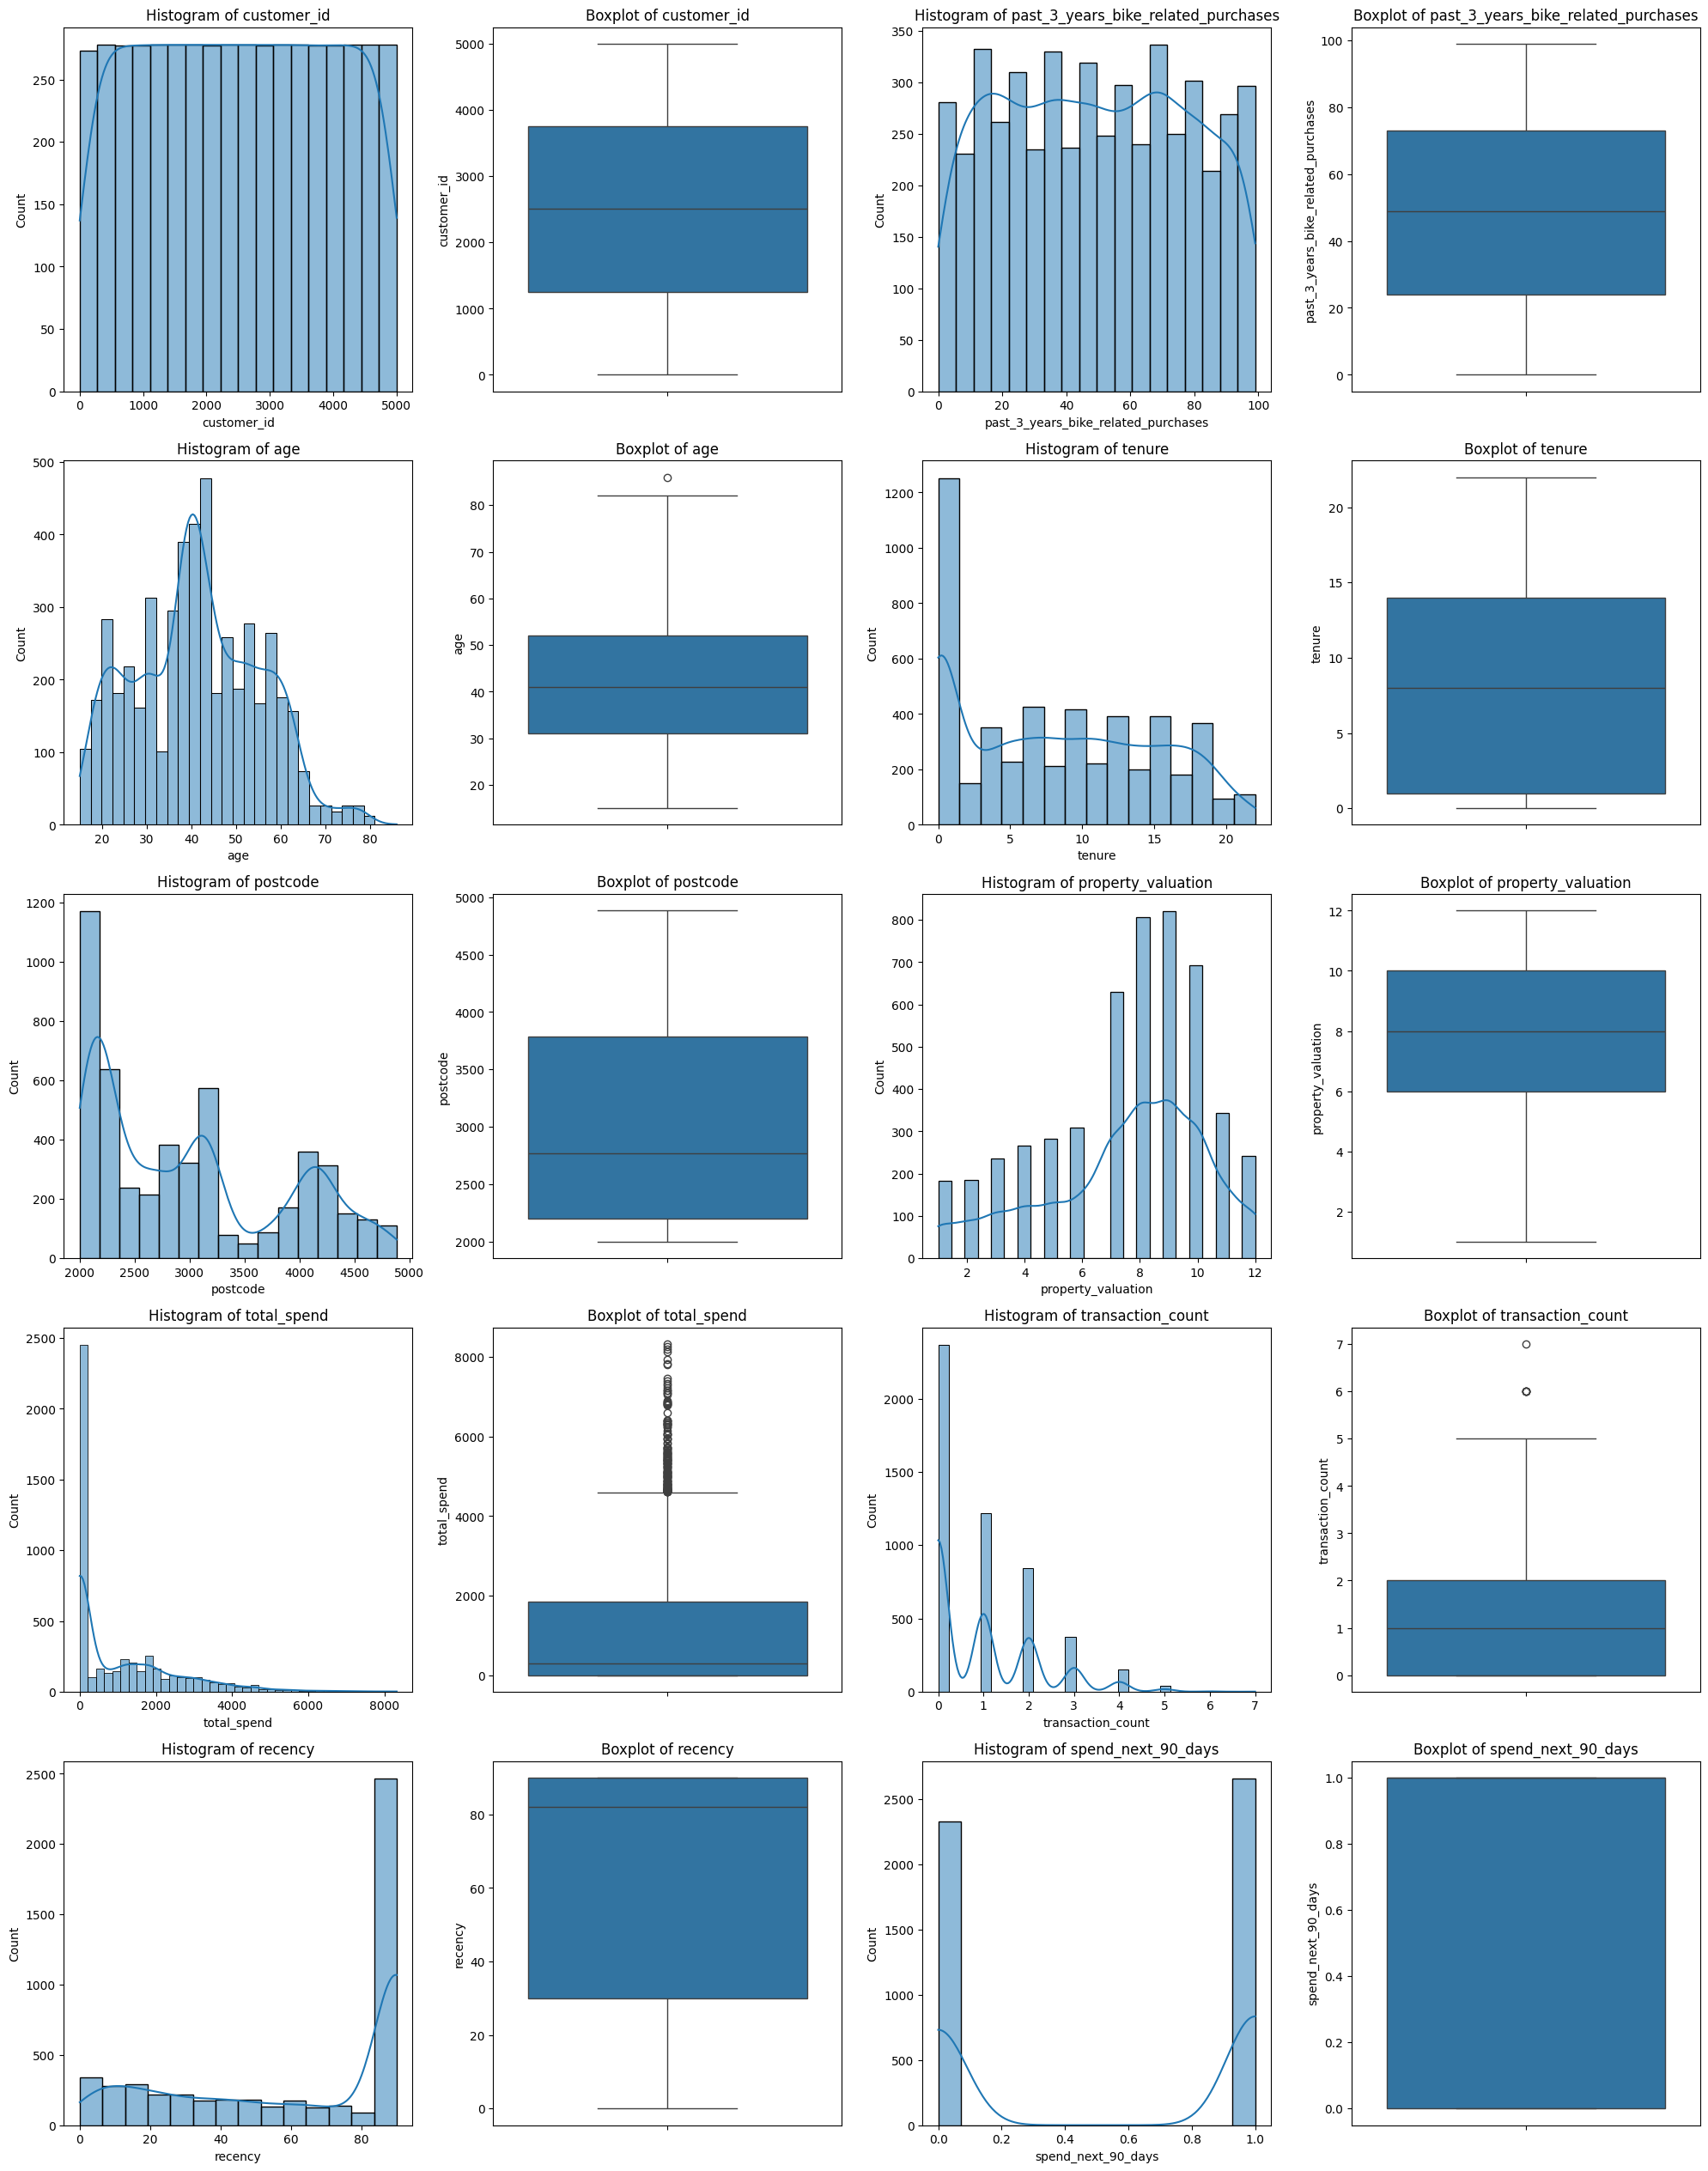

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns
num_columns = Q2_features.select_dtypes(exclude='object')

n_cols = 4  # Set the number of columns per row to 4
n_rows = len(num_columns.columns) // n_cols + (len(num_columns.columns) % n_cols > 0)  # Calculate number of rows

# Create a grid for plots with 4 columns per row
fig, axes = plt.subplots(nrows=n_rows*2, ncols=n_cols, figsize=(5*n_cols, 5*n_rows*2))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through the numerical columns and plot histogram and boxplot
for i, col in enumerate(num_columns.columns):
    # Plot histogram in the top half of the grid
    sns.histplot(num_columns[col], ax=axes[i*2], kde=True)
    axes[i*2].set_title(f'Histogram of {col}')
    
    # Plot boxplot in the bottom half of the grid
    sns.boxplot(y=num_columns[col], ax=axes[i*2 + 1])
    axes[i*2 + 1].set_title(f'Boxplot of {col}')

# Remove empty subplots (if any)
for j in range(i*2 + 2, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

In [18]:
def remove_outLiers(column):
    Q1 = Q2_features[column].quantile(0.25)
    Q3 = Q2_features[column].quantile(0.75)

    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    Q2_features.drop(Q2_features[(Q2_features[column] < lower_bound) | (Q2_features[column]> upper_bound)].index, inplace=True)

In [19]:
num_columns = Q2_features.select_dtypes(exclude='object')

for column in num_columns:
    remove_outLiers(column)

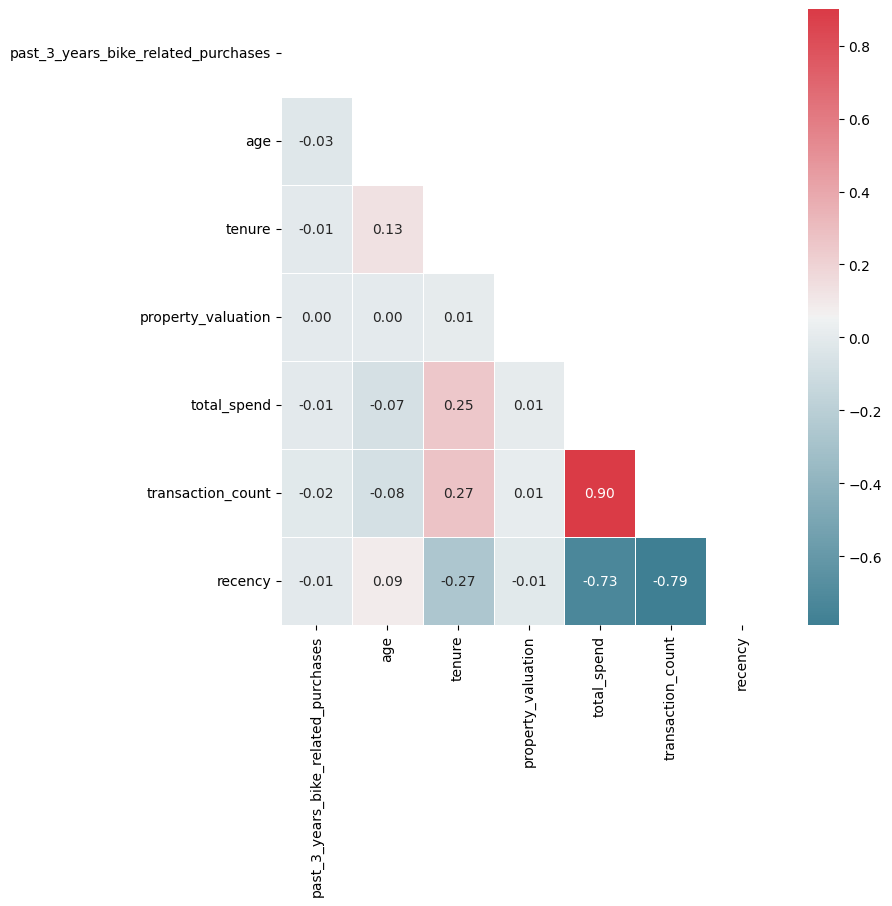

In [20]:
num_cloumns = Q2_features[['past_3_years_bike_related_purchases','age','tenure','property_valuation','total_spend','transaction_count','recency']]
corr = num_cloumns.corr()
fig, ax = plt.subplots(figsize=(8, 8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

In [21]:
Q2_features.columns

Index(['customer_id', 'name', 'gender', 'past_3_years_bike_related_purchases',
       'age', 'job_title', 'job_industry_category', 'wealth_segment',
       'owns_car', 'tenure', 'address', 'postcode', 'state',
       'property_valuation', 'total_spend', 'transaction_count',
       'first_purchase', 'last_purchase', 'recency', 'spend_next_90_days'],
      dtype='object')

In [22]:
X = Q2_features[['past_3_years_bike_related_purchases', 'age', 'job_industry_category', 'wealth_segment', 'owns_car', 'tenure', 'state', 'property_valuation', 'total_spend', 'transaction_count', 'recency']]

y = Q2_features['spend_next_90_days']

In [23]:
y.value_counts()

spend_next_90_days
1    2553
0    2297
Name: count, dtype: int64

In [24]:
categorical_cloumns = X.select_dtypes(include='object').columns.to_list()
num_cloumns = X.select_dtypes(exclude='object').columns.to_list()

In [25]:
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_cloumns_Pipeline = Pipeline([
    ('scaler', RobustScaler())
])

categorical_cloumns_Pipeline = Pipeline([
    ('Binary_cat', OneHotEncoder(sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', num_cloumns_Pipeline, num_cloumns),
    ('categorical', categorical_cloumns_Pipeline, categorical_cloumns)
]).set_output(transform='pandas')

In [26]:
Q2_X_preprocessed = preprocessor.fit_transform(X) 

In [27]:
Q3_X = Q3_features[['past_3_years_bike_related_purchases', 'age', 'job_industry_category', 'wealth_segment', 'owns_car', 'tenure', 'state', 'property_valuation', 'total_spend', 'transaction_count', 'recency']]

Q3_X_preprocessed = preprocessor.transform(Q3_X)

---
## **Random Forest Classifier**

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state=42)

rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, n_jobs=-1, verbose=2)

rf_grid_search.fit(Q2_X_preprocessed, y)

# Best parameters and performance
print(f"Best parameters for Random Forest: {rf_grid_search.best_params_}")
print(f"Best Random Forest score: {rf_grid_search.best_score_}")

rf_model = rf_grid_search.best_estimator_

y_pred = rf_model.predict(Q3_X_preprocessed)

y_test = Q3_features['spend_next_90_days']

accuracy = accuracy_score(y_test, y_pred) * 100
print(f"\nRandom Forest Accuracy: {accuracy:0.3f}%\n")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Random Forest score: 0.7074226804123711

Random Forest Accuracy: 76.707%

              precision    recall  f1-score   support

           0       0.77      0.71      0.74      2311
           1       0.76      0.82      0.79      2682

    accuracy                           0.77      4993
   macro avg       0.77      0.76      0.76      4993
weighted avg       0.77      0.77      0.77      4993



In [29]:
pd.DataFrame(y_pred).value_counts()

0
1    2875
0    2118
Name: count, dtype: int64

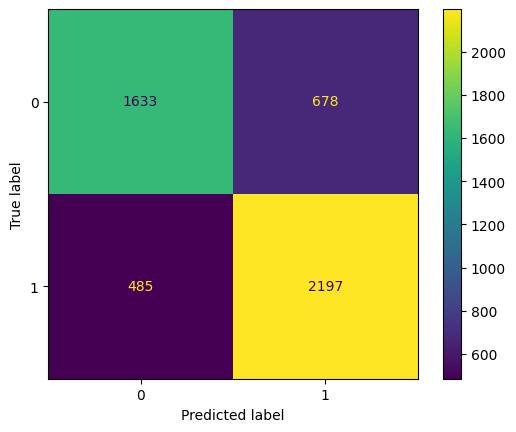

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay 
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

---
## **Logistic Regression**

In [31]:
from sklearn.linear_model import LogisticRegression

# Define the hyperparameter grid for Logistic Regression
lr_param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'saga'],
    'max_iter': [100, 200, 500]
}

lr_model = LogisticRegression(random_state=42)

lr_grid_search = GridSearchCV(estimator=lr_model, param_grid=lr_param_grid, cv=5, n_jobs=-1, verbose=2)

lr_grid_search.fit(Q2_X_preprocessed, y)

# Best parameters and performance
print(f"Best parameters for Logistic Regression: {lr_grid_search.best_params_}")
print(f"Best Logistic Regression score: {lr_grid_search.best_score_}")

lr_model = lr_grid_search.best_estimator_

y_pred = lr_model.predict(Q3_X_preprocessed)

y_test = Q3_features['spend_next_90_days']

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"\nLogistic Regression Accuracy: {accuracy:0.3f}%\n")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best parameters for Logistic Regression: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
Best Logistic Regression score: 0.7022680412371135

Logistic Regression Accuracy: 72.121%

              precision    recall  f1-score   support

           0       0.70      0.69      0.70      2311
           1       0.74      0.75      0.74      2682

    accuracy                           0.72      4993
   macro avg       0.72      0.72      0.72      4993
weighted avg       0.72      0.72      0.72      4993



In [32]:
pd.DataFrame(y_pred).value_counts()

0
1    2716
0    2277
Name: count, dtype: int64

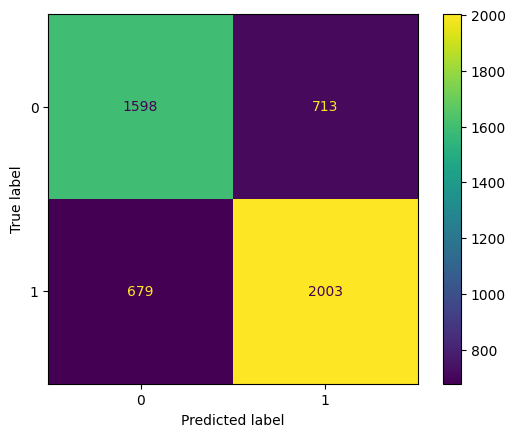

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay 
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

---
## **SVC**

In [34]:
from sklearn.svm import SVC

# Define the hyperparameter grid for SVM
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4],  # for polynomial kernel
}

svm_model = SVC(probability=True ,random_state=42)

svm_grid_search = GridSearchCV(estimator=svm_model, param_grid=svm_param_grid, cv=5, n_jobs=-1, verbose=2)

svm_grid_search.fit(Q2_X_preprocessed, y)

# Best parameters and performance
print(f"Best parameters for SVM: {svm_grid_search.best_params_}")
print(f"Best SVM score: {svm_grid_search.best_score_}")

svm_model_f = svm_grid_search.best_estimator_

y_pred = svm_model_f.predict(Q3_X_preprocessed)

y_test = Q3_features['spend_next_90_days']

accuracy = accuracy_score(y_test, y_pred) * 100
print(f"\nSVC Accuracy: {accuracy:0.3f}%\n")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters for SVM: {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Best SVM score: 0.7063917525773197

SVC Accuracy: 73.803%

              precision    recall  f1-score   support

           0       0.74      0.66      0.70      2311
           1       0.73      0.80      0.77      2682

    accuracy                           0.74      4993
   macro avg       0.74      0.73      0.73      4993
weighted avg       0.74      0.74      0.74      4993



In [35]:
pd.DataFrame(y_pred).value_counts()

0
1    2930
0    2063
Name: count, dtype: int64

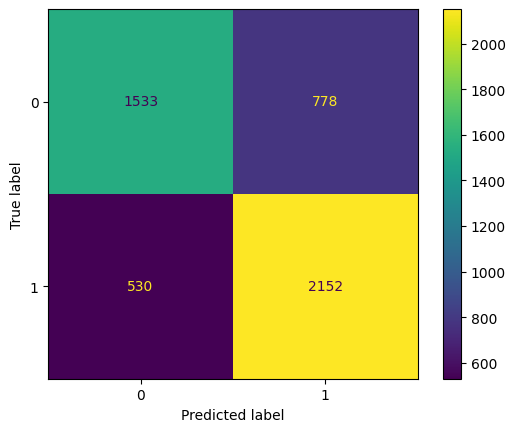

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay 
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

---
## **Saving The Best Model**

In [37]:
import joblib

# Define the full pipeline with preprocessing and the already tuned model
pipeline = Pipeline([ 
    ('preprocessor', preprocessor), 
    ('model', rf_model) 
])

# Save the entire pipeline (preprocessing + model) using joblib
joblib.dump(pipeline, 'Saved Models\Q2 tranied pipeline_model.pkl')

['Saved Models\\Q2 tranied pipeline_model.pkl']

---
## **Q3 Features**
## **2017 Q4 Purchases Prediction with Accuracy: 76.707%**

In [38]:
# Get the probabilities for the positive class (spending in the next 90 days)
Q3_y_pred_proba = rf_model.predict_proba(Q3_X_preprocessed)[:, 1]  # Only take the probability of class '1'
Q3_features['spend_next_90_days_pred_proba'] = np.round(Q3_y_pred_proba * 100, 1)  # Rounded to 1 decimal places

# Predictions (binary)
Q3_y_pred = rf_model.predict(Q3_X_preprocessed)
Q3_features['spend_next_90_days_pred'] = Q3_y_pred

Q3_features.head()

,customer_id,name,gender,past_3_years_bike_related_purchases,age,job_title,job_industry_category,wealth_segment,owns_car,tenure,...,state,property_valuation,total_spend,transaction_count,first_purchase,last_purchase,recency,spend_next_90_days,spend_next_90_days_pred_proba,spend_next_90_days_pred
0,1,Laraine Medendorp,Female,93,64,Executive Secretary,Health,Mass Customer,Yes,11,...,New South Wales,10,0.00,0.0,0,0,90.0,1,29.0,0
1,2,Eli Bockman,Male,81,37,Administrative Officer,Financial Services,Mass Customer,Yes,16,...,New South Wales,10,1992.93,1.0,2017-08-24 00:00:00,2017-08-24 00:00:00,37.0,0,78.0,1
2,4,Talbot,Male,33,56,N/A,IT,Mass Customer,No,7,...,Queensland,9,0.00,0.0,0,0,90.0,0,30.0,0
3,5,Sheila-kathryn Calton,Female,56,40,Senior Editor,N/A,Affluent Customer,Yes,8,...,New South Wales,4,774.53,1.0,2017-08-16 00:00:00,2017-08-16 00:00:00,45.0,1,85.0,1
4,6,Curr Duckhouse,Male,35,51,N/A,Retail,High Net Worth,Yes,13,...,Victoria,9,230.91,1.0,2017-09-16 00:00:00,2017-09-16 00:00:00,14.0,1,73.0,1


In [39]:
y_test = Q3_features['spend_next_90_days']
y_pred = Q3_features['spend_next_90_days_pred']

accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Accuracy: {accuracy:0.3f}%")

Accuracy: 76.707%


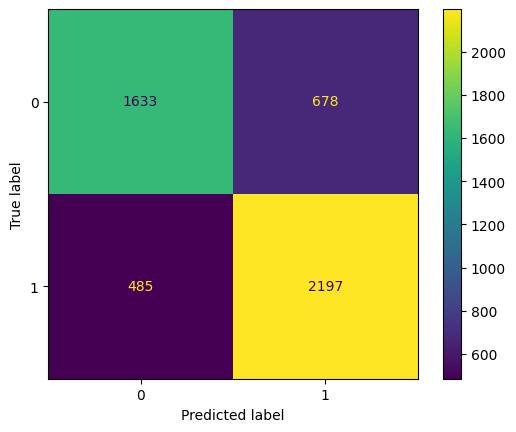

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay 
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [41]:
Q3_features.to_csv('Preprocessing Notebooks\Final Sheets\Q3_features 2017 Q4 Purchases Prediction.csv', index=False)

In [42]:
import joblib 
loaded_model = joblib.load('Saved Models\Q2 tranied pipeline_model.pkl') 

# Use the loaded pipeline to make predictions 
y_pred = loaded_model.predict(Q3_X) 

Q3_features['loaded_model_spend_next_90_days_pred'] = y_pred
Q3_features.head()

,customer_id,name,gender,past_3_years_bike_related_purchases,age,job_title,job_industry_category,wealth_segment,owns_car,tenure,...,property_valuation,total_spend,transaction_count,first_purchase,last_purchase,recency,spend_next_90_days,spend_next_90_days_pred_proba,spend_next_90_days_pred,loaded_model_spend_next_90_days_pred
0,1,Laraine Medendorp,Female,93,64,Executive Secretary,Health,Mass Customer,Yes,11,...,10,0.00,0.0,0,0,90.0,1,29.0,0,0
1,2,Eli Bockman,Male,81,37,Administrative Officer,Financial Services,Mass Customer,Yes,16,...,10,1992.93,1.0,2017-08-24 00:00:00,2017-08-24 00:00:00,37.0,0,78.0,1,1
2,4,Talbot,Male,33,56,N/A,IT,Mass Customer,No,7,...,9,0.00,0.0,0,0,90.0,0,30.0,0,0
3,5,Sheila-kathryn Calton,Female,56,40,Senior Editor,N/A,Affluent Customer,Yes,8,...,4,774.53,1.0,2017-08-16 00:00:00,2017-08-16 00:00:00,45.0,1,85.0,1,1
4,6,Curr Duckhouse,Male,35,51,N/A,Retail,High Net Worth,Yes,13,...,9,230.91,1.0,2017-09-16 00:00:00,2017-09-16 00:00:00,14.0,1,73.0,1,1


In [43]:
y_test = Q3_features['spend_next_90_days']
y_pred = Q3_features['loaded_model_spend_next_90_days_pred']

accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Accuracy: {accuracy:0.3f}%")
print(classification_report(y_test, y_pred))

Accuracy: 76.707%
              precision    recall  f1-score   support

           0       0.77      0.71      0.74      2311
           1       0.76      0.82      0.79      2682

    accuracy                           0.77      4993
   macro avg       0.77      0.76      0.76      4993
weighted avg       0.77      0.77      0.77      4993

